To help you find your bearings with regard to t-tests, calculate the t-values for the following numbers:

1. $\bar{y_1}= 5$, $\bar{y_2}= 8$, $s_1= 1$, $s_2= 3$, $N_1= 200$, $N_2= 500$
2. $\bar{y_1}= 1090$, $\bar{y_2}= 999$, $s_1= 400$, $s_2= 30$, $N_1= 900$, $N_2= 100$
3. $\bar{y_1}= 45$, $\bar{y_2}= 40$, $s_1= 45$, $s_2= 40$, $N_1= 2000$, $N_2= 2000$

In [1]:
y1 = 5
y2 = 8
s1 = 1
s2 = 3
N1 = 200
N2 = 500

In [2]:
( y1 - y2 ) / (s1**2/N1 + s2**2/N2)**.5

-19.78141420187361

In [105]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [137]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv'
#PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_final.csv'
experiment_data = pd.read_csv(PATH)

In [138]:
experiment_data.head(10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


In [139]:
# How large is each group?
controlcount = experiment_data[experiment_data['test'] == 0].shape[0]
testcount = experiment_data[experiment_data['test'] == 1].shape[0]
print(controlcount)
print(testcount)

# What is the signup rate of test and control?
controlsignup = experiment_data[(experiment_data.test == 0) & (experiment_data.is_signed_up == 1)].shape[0]
testsignup = experiment_data[(experiment_data.test == 1) & (experiment_data.is_signed_up == 1)].shape[0]
print(controlsignup)
print(controlsignup / controlcount)

print(testsignup)
print(testsignup / testcount)

# Is the experiment already significant?
stats.ttest_ind(experiment_data[experiment_data.test == 1].is_signed_up,
                experiment_data[experiment_data.test == 0].is_signed_up)

30241
3372
4448
0.14708508316523924
462
0.13701067615658363


Ttest_indResult(statistic=-1.5711354292574262, pvalue=0.11616060761145311)

In [140]:
dates = experiment_data['treatment_date'].unique()

In [141]:
df = pd.DataFrame()
df['treatment_date'] = dates
df['test_count'] = 0
df['control_count'] = 0
df['test_signup'] = 0
df['control_signup'] = 0

In [142]:
testbydate = experiment_data[experiment_data.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').count()

testbydatedic = {}

for row in testbydate.iterrows():
    testbydatedic[row[0]] = row[1]

for i,row in df.iterrows():
    df.at[i,'test_count'] = testbydatedic[row['treatment_date']]   

In [143]:
controlbydate = experiment_data[experiment_data.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').count()

controlbydatedic = {}

for row in controlbydate.iterrows():
    controlbydatedic[row[0]] = row[1]

for i,row in df.iterrows():
    df.at[i,'control_count'] = controlbydatedic[row['treatment_date']]

In [144]:
testbydate = experiment_data[experiment_data.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').sum()

testbydatedic = {}

for row in testbydate.iterrows():
    testbydatedic[row[0]] = row[1]

for i,row in df.iterrows():
    df.at[i,'test_signup'] = testbydatedic[row['treatment_date']]   


In [145]:
controlbydate = experiment_data[experiment_data.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').sum()

controlbydatedic = {}

for row in controlbydate.iterrows():
    controlbydatedic[row[0]] = row[1]

for i,row in df.iterrows():
    df.at[i,'control_signup'] = controlbydatedic[row['treatment_date']]  



df

,treatment_date,test_count,control_count,test_signup,control_signup
0,2016-04-01,219,1901,52,387
1,2016-04-02,256,2272,53,447
2,2016-04-03,178,1864,36,363
3,2016-04-04,320,2609,69,501
4,2016-04-05,195,1907,48,367
5,2016-04-06,189,1954,35,366
6,2016-04-07,303,2680,46,468
7,2016-04-08,223,1869,30,321
8,2016-04-09,304,2679,30,426
9,2016-04-10,305,2613,32,343


In [146]:
df['test_rate'] = df['test_signup']/df['test_count']
df['control_rate'] = df['control_signup']/df['control_count']
df

,treatment_date,test_count,control_count,test_signup,control_signup,test_rate,control_rate
0,2016-04-01,219,1901,52,387,0.237443,0.203577
1,2016-04-02,256,2272,53,447,0.207031,0.196743
2,2016-04-03,178,1864,36,363,0.202247,0.194742
3,2016-04-04,320,2609,69,501,0.215625,0.192028
4,2016-04-05,195,1907,48,367,0.246154,0.192449
5,2016-04-06,189,1954,35,366,0.185185,0.187308
6,2016-04-07,303,2680,46,468,0.151815,0.174627
7,2016-04-08,223,1869,30,321,0.134529,0.171750
8,2016-04-09,304,2679,30,426,0.098684,0.159015
9,2016-04-10,305,2613,32,343,0.104918,0.131267


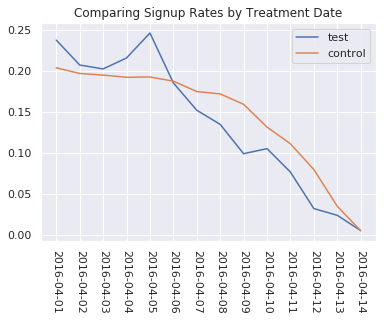

In [147]:
sns.set(style="darkgrid")

fig = plt.plot(df['treatment_date'],df['test_rate'])
plt.plot(df['control_rate'])
plt.xticks(rotation=-90)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()